---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Modellings**](#Section8)<br>
10. [**Model Evaluation and Model Interpretation**](#Section8)<br>
11. [**Summarization**](#Section9)</br>
  11.1 [**Conclusion**](#Section91)</br>
  11.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---
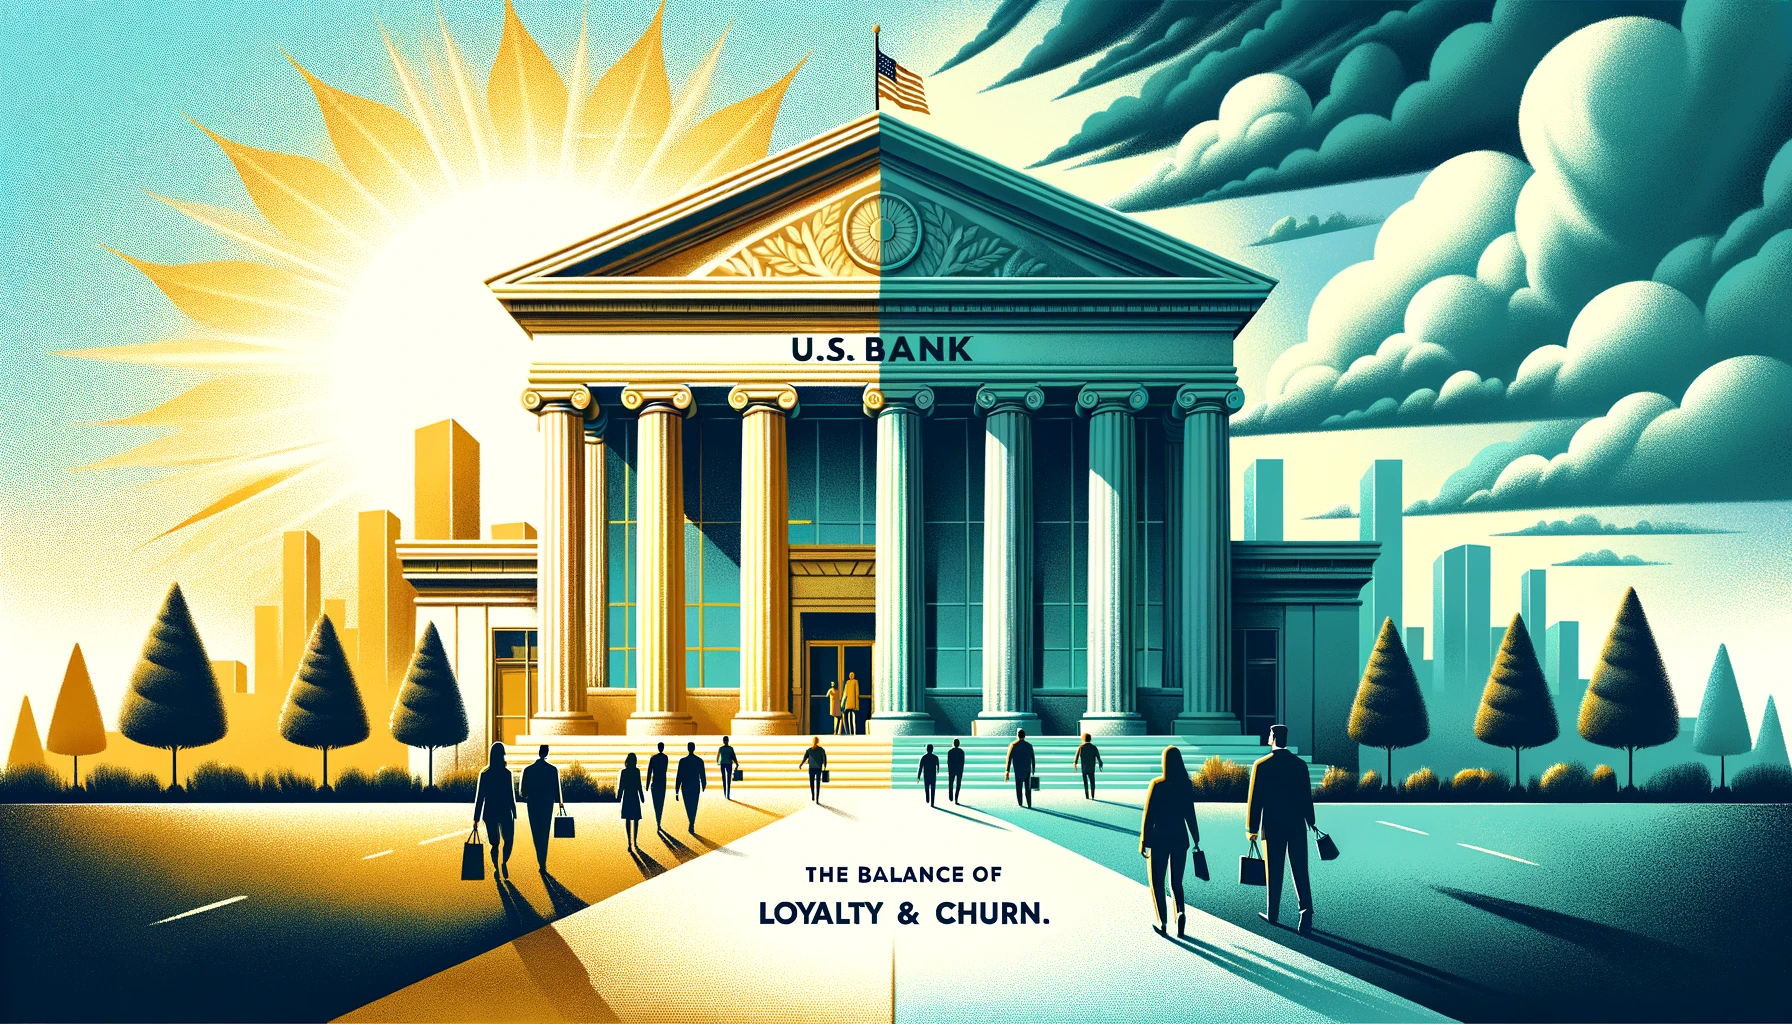


The U.S. Bank, a prominent financial institution, has long been at the forefront of providing diverse banking solutions to its vast clientele. As with any service-oriented industry, maintaining a steady and loyal customer base is paramount for its sustained growth. Customer churn, which refers to the phenomenon of customers leaving the bank to seek services elsewhere, can have significant financial implications. A proactive approach to understanding and mitigating customer churn is not only beneficial for the bank's financial health but also essential for refining its customer-centric strategies.

---
<a name = Section2></a>
# **2. Problem Statement**
---
**Background:**
The U.S. Bank has been serving a vast clientele, offering them a range of financial products and services. Over time, like any other service-oriented industry, the bank has experienced a churn of customers. Some customers, for various reasons, decide to leave the bank, potentially choosing competitors' offerings over U.S. Bank's. Understanding the reasons behind this churn can lead to better customer retention strategies and overall improved customer satisfaction.

**Objective:**
Given a dataset that captures various attributes of the bank's customers, such as their credit score, geography, gender, age, tenure with the bank, balance, number of products with the bank, credit card ownership, active membership status, and estimated salary, our goal is to:

**Analyze the factors that contribute most to customer churn.**

    1.Develop a predictive model that can forecast the likelihood of a customer leaving the bank.
    2.Provide recommendations on how the bank can potentially reduce customer churn based on the insights drawn from the analysis.

**Significance:**
    Successfully addressing the problem of customer churn can result in:
    
1. Increased Revenue: Retaining existing customers is often more cost-effective than acquiring new ones. By reducing churn, the bank can ensure a steady flow of revenue.
2. Enhanced Customer Experience: By understanding the pain points leading to churn, the bank can refine its services, leading to improved customer satisfaction.
3. Strategic Growth: Insights from churn analysis can guide the bank in its future growth strategies, ensuring it remains competitive in the market.

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**

In [1]:
!pip install pandas numpy scikit-learn seaborn matplotlib

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- Features of the U.S Bank dataset imported:
    
| Id | Feature          | Description                                                                                   |
|----|------------------|-----------------------------------------------------------------------------------------------|
| 1  | RowNumber        | A unique identifier for each row.                                                             |
| 2  | CustomerId       | A unique identifier for each customer.                                                        |
| 3  | Surname          | The surname of the customer.                                                                  |
| 4  | CreditScore      | The credit score of the customer, a measure of creditworthiness.                              |
| 5  | Geography        | The country of residence for the customer.                                                    |
| 6  | Gender           | The gender of the customer (e.g., Male, Female).                                              |
| 7  | Age              | The age of the customer in years.                                                             |
| 8  | Tenure           | The number of years the customer has been with the bank.                                      |
| 9  | Balance          | The current balance (in currency) of the customers account.                                   |
| 10 | NumOfProducts    | The number of products or services the customer has with the bank (e.g., savings, credit card)|
| 11 | HasCrCard        | Binary flag indicating if the customer has a credit card with the bank (1 = Yes, 0 = No).     |
| 12 | IsActiveMember   | Binary flag indicating if the customer is an active member (1 = Yes, 0 = No).                 |
| 13 | EstimatedSalary  | The estimated annual salary of the customer.                                                  |
| 14 | Exited           | Binary flag indicating if the customer exited/left the bank (1 = Yes, 0 = No).                |


In [11]:
churn_data = pd.read_csv(filepath_or_buffer = r'C:\Users\HP\OneDrive\Desktop\DATA SCIENCE\Datasets\Customer_Churn_\Churn_Modelling.csv')
print('Data Shape:', churn_data.shape)
churn_data.head()

Data Shape: (10000, 14)


RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---
Profiling provides an overview of the dataset, including information such as the number of missing values, the distribution of values in each column, correlations between columns, and more. This initial step can help us identify anomalies, outliers, and areas that need cleaning or transformation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


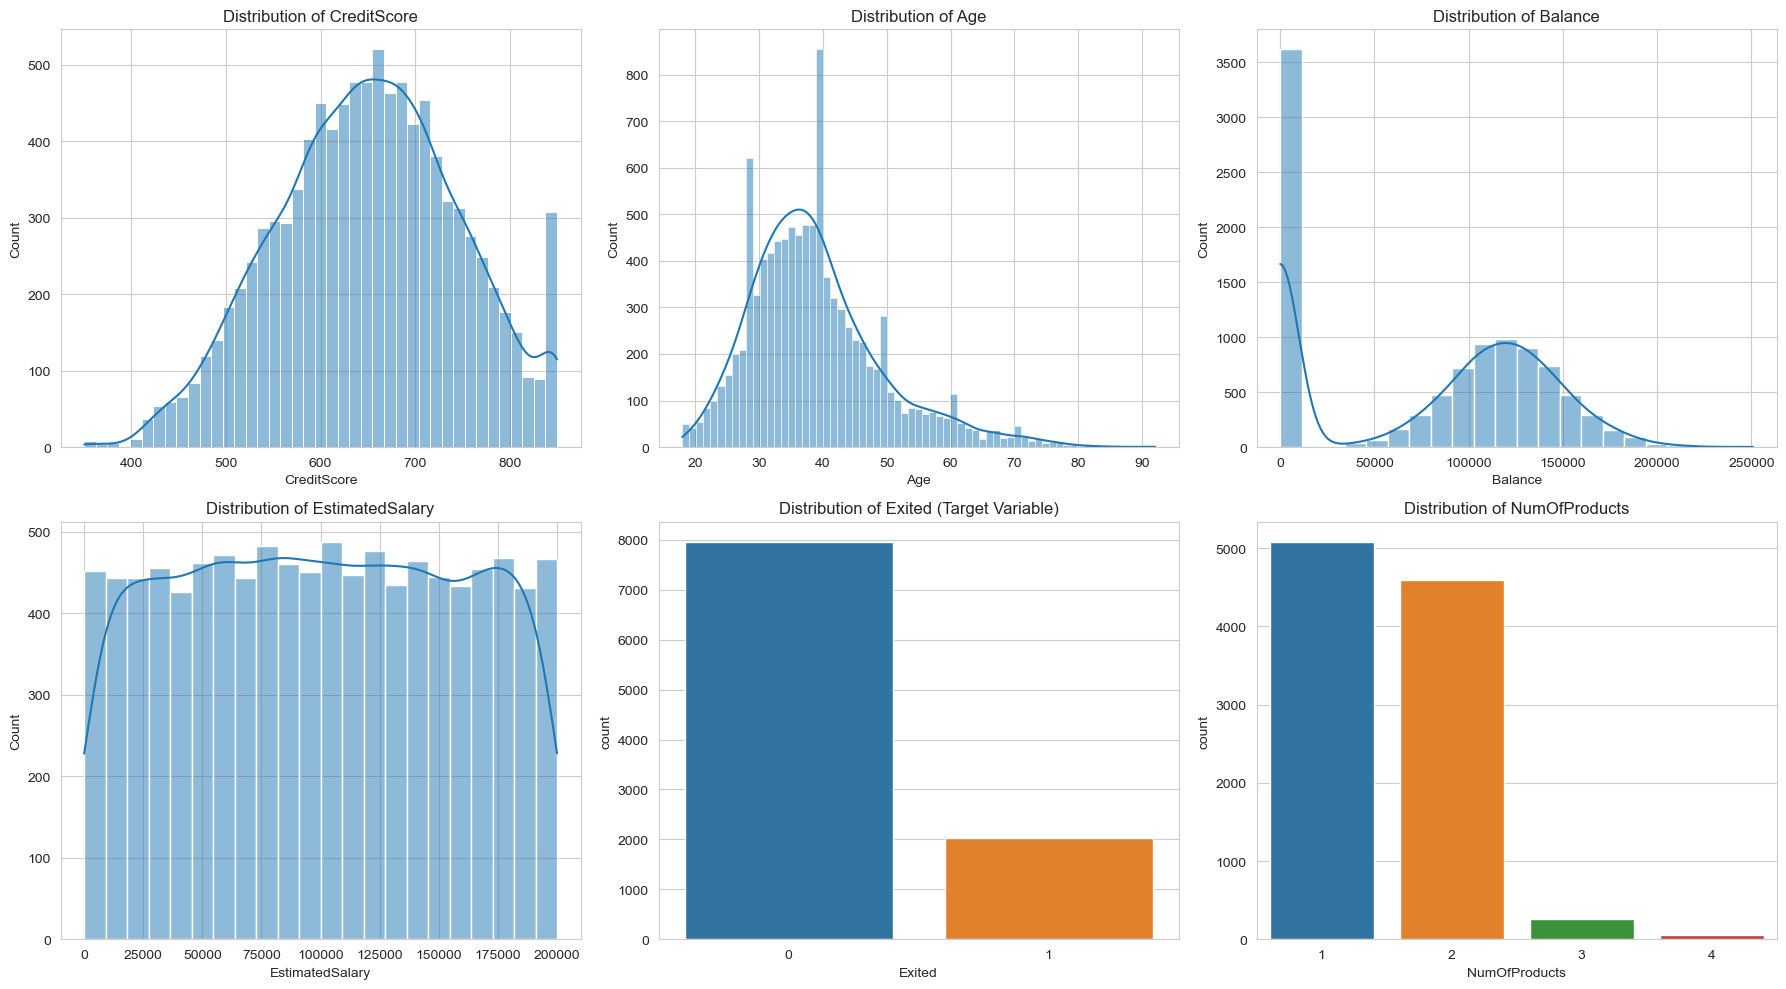

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
churn_data.info()

# Checking for missing values
missing_values = churn_data.isnull().sum()

# Visualization of distribution for key features and target variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Distribution of 'CreditScore'
sns.histplot(churn_data['CreditScore'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of CreditScore')

# Distribution of 'Age'
sns.histplot(churn_data['Age'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Age')

# Distribution of 'Balance'
sns.histplot(churn_data['Balance'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Balance')

# Distribution of 'EstimatedSalary'
sns.histplot(churn_data['EstimatedSalary'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of EstimatedSalary')

# Distribution of 'Exited' (Target Variable)
sns.countplot(x='Exited', data=churn_data, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Exited (Target Variable)')

# Distribution of 'NumOfProducts'
sns.countplot(x='NumOfProducts', data=churn_data, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of NumOfProducts')

plt.tight_layout()
plt.show()

missing_values

**Observation:**

-> Missing Values: There are no missing values in any of the columns.

-> CreditScore: Most customers have a credit score in the range of 600-750, but there are a few with scores below 500, which are considered low.

-> Age: Most of the bank's customers are between 20 and 50 years old. There's a right-skewed distribution, indicating that there are fewer older customers.

-> Balance: A significant number of customers have a balance of zero, which might be worth investigating further. Other customers have a balance distributed across a range of values.

-> EstimatedSalary: The distribution appears uniform, indicating that the bank has customers from various income levels.

-> Exited (Target Variable): The majority of customers have not exited (value = 0). This highlights that the dataset is imbalanced with fewer customers who have exited.

-> NumOfProducts: Most customers have 1 or 2 products with the bank. Very few customers have 3 or 4 products.

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---
Data pre-processing is a crucial step before modeling, as it prepares the data and ensures that it's in the right format and structure for machine learning algorithms. Here are the steps we'll take:

1. Drop Irrelevant Columns: Columns like RowNumber, CustomerId, and Surname won't provide meaningful information for our modeling purposes.
2. Encoding Categorical Variables: Convert categorical variables like Geography and Gender into a format that can be provided to machine learning algorithms.
3. Handling Outliers: Check for and handle outliers in features like Age, CreditScore, etc.
4. Feature Scaling: Standardize the range of independent variables to ensure that each feature contributes equally to the model.
5. Splitting the Data: Divide the dataset into training and testing sets.


In [15]:
# Drop irrelevant columns
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
churn_data_cleaned = churn_data.drop(columns=columns_to_drop)

churn_data_cleaned.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [16]:
## For our dataset, the Geography and Gender columns are categorical and need to be encoded.For simplicity, we'll use:

# One-Hot Encoding for the Geography column since it has more than two categories.
# Label Encoding for the Gender column since it has just two categories (Male and Female).

# One-Hot Encoding for 'Geography' column
geography_encoded = pd.get_dummies(churn_data_cleaned['Geography'], drop_first=True)
churn_data_cleaned = pd.concat([churn_data_cleaned, geography_encoded], axis=1)
churn_data_cleaned.drop('Geography', axis=1, inplace=True)

# Label Encoding for 'Gender' column
label_encoder = LabelEncoder()
churn_data_cleaned['Gender'] = label_encoder.fit_transform(churn_data_cleaned['Gender'])

churn_data_cleaned.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Germany  Spain  
0               1        101348.88       1        0      0  
1               1        112542.58       0        0      1  
2               0        113931.57       1        0      0  
3               0         93826.63       0        0      0  
4               1         79084.10       0        0      1

**Note:**
The Geography column has been one-hot encoded, resulting in two new columns: Germany and Spain. If both these columns are 0, it implies the country is France (since we used drop_first=True to avoid multicollinearity).

The Gender column has been label encoded: 0 represents Female and 1 represents Male.

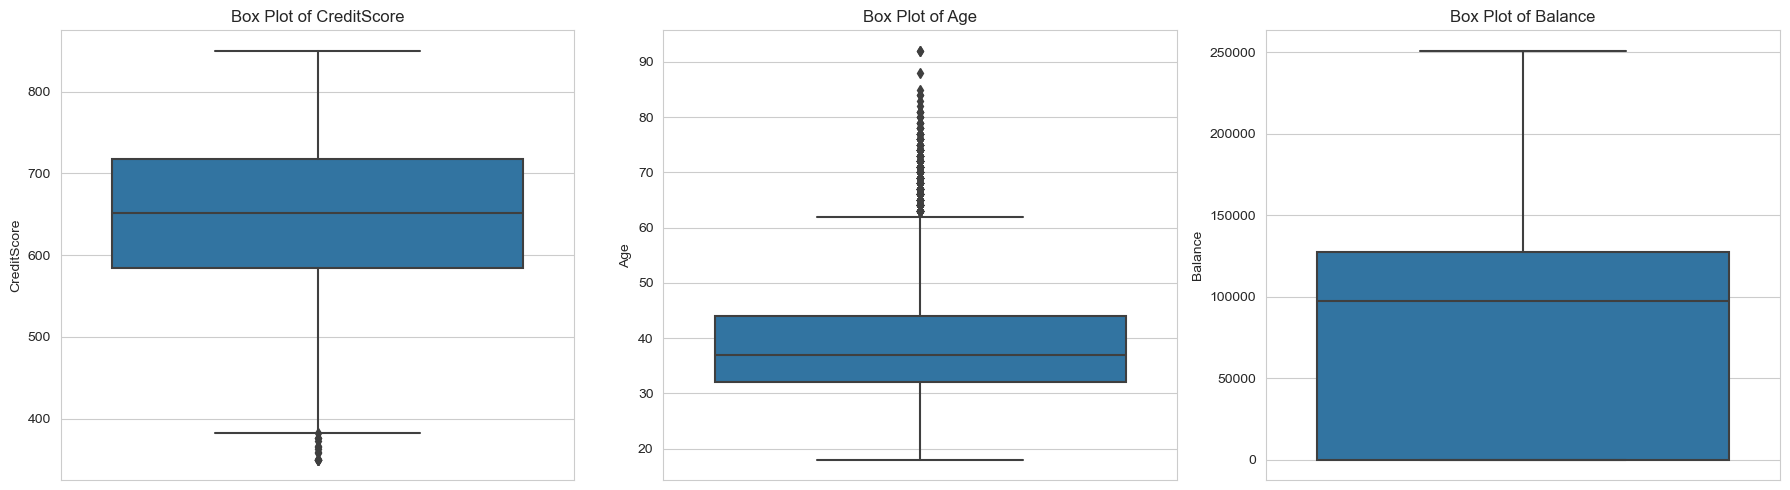

In [17]:
# Handling Outliers
# Visualizing potential outliers using box plots

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Box plot for 'CreditScore'
sns.boxplot(y=churn_data_cleaned['CreditScore'], ax=axes[0])
axes[0].set_title('Box Plot of CreditScore')

# Box plot for 'Age'
sns.boxplot(y=churn_data_cleaned['Age'], ax=axes[1])
axes[1].set_title('Box Plot of Age')

# Box plot for 'Balance'
sns.boxplot(y=churn_data_cleaned['Balance'], ax=axes[2])
axes[2].set_title('Box Plot of Balance')

plt.tight_layout()
plt.show()

In [18]:
# Feature Scaling of numerical columns: CreditScore, Age, Tenure, Balance, and EstimatedSalary.
# Features to scale
features_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
churn_data_cleaned[features_to_scale] = scaler.fit_transform(churn_data_cleaned[features_to_scale])

churn_data_cleaned.head()

CreditScore  Gender       Age    Tenure   Balance  NumOfProducts  \
0    -0.326221       0  0.293517 -1.041760 -1.225848              1   
1    -0.440036       0  0.198164 -1.387538  0.117350              1   
2    -1.536794       0  0.293517  1.032908  1.333053              3   
3     0.501521       0  0.007457 -1.387538 -1.225848              2   
4     2.063884       0  0.388871 -1.041760  0.785728              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Germany  Spain  
0          1               1         0.021886       1        0      0  
1          0               1         0.216534       0        0      1  
2          1               0         0.240687       1        0      0  
3          0               0        -0.108918       0        0      0  
4          1               1        -0.365276       0        0      1

In [19]:
# # Splitting the data into training and testing sets

X = churn_data_cleaned.drop('Exited', axis=1)  # Features (excluding the target variable)
y = churn_data_cleaned['Exited']  # Target variable

# Split the data with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

**The data has been successfully split:**

Training set: 8,000 samples
Testing set: 2,000 samples

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

For post-profiling, we'll:

1. Review the structure of the cleaned and transformed dataset.
2. Visualize the distribution of the scaled features.
3. Check the distribution of the target variable in the training set to ensure it's representative of the original data.

In [20]:
# Reviewing the structure of the cleaned and transformed dataset
post_processed_data_info = X_train.info()
post_processed_data_statistics = X_train.describe()

post_processed_data_info, post_processed_data_statistics

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8000 non-null   float64
 1   Gender           8000 non-null   int32  
 2   Age              8000 non-null   float64
 3   Tenure           8000 non-null   float64
 4   Balance          8000 non-null   float64
 5   NumOfProducts    8000 non-null   int64  
 6   HasCrCard        8000 non-null   int64  
 7   IsActiveMember   8000 non-null   int64  
 8   EstimatedSalary  8000 non-null   float64
 9   Germany          8000 non-null   uint8  
 10  Spain            8000 non-null   uint8  
dtypes: float64(5), int32(1), int64(3), uint8(2)
memory usage: 609.4 KB


(None,
        CreditScore       Gender          Age       Tenure      Balance  \
 count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
 mean      0.011576     0.545250    -0.002293    -0.003086    -0.006150   
 std       0.997079     0.497979     1.003020     0.996470     1.001069   
 min      -3.109504     0.000000    -1.994969    -1.733315    -1.225848   
 25%      -0.678012     0.000000    -0.660018    -0.695982    -1.225848   
 50%       0.025569     1.000000    -0.183251    -0.004426     0.319927   
 75%       0.708456     1.000000     0.484225     0.687130     0.819393   
 max       2.063884     1.000000     5.061197     1.724464     2.795323   
 
        NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
 count    8000.000000  8000.000000     8000.000000      8000.000000   
 mean        1.531375     0.703500        0.512750         0.005931   
 std         0.579705     0.456743        0.499869         1.000197   
 min         1.000000     0.0000

**Post-Profiling Overview:
The transformed training dataset contains 8,000 entries and 11 features.**

Here's a summary of the post-processed features:

CreditScore, Age, Tenure, Balance, EstimatedSalary: These numerical features have been standardized with a mean close to 0 and a standard deviation close to 1.

Gender: Label encoded with values 0 (Female) and 1 (Male).

NumOfProducts, HasCrCard, IsActiveMember: Retained in their original integer format.

Germany, Spain: One-hot encoded columns representing the geography of the customer. If both are 0, it implies the country is France.

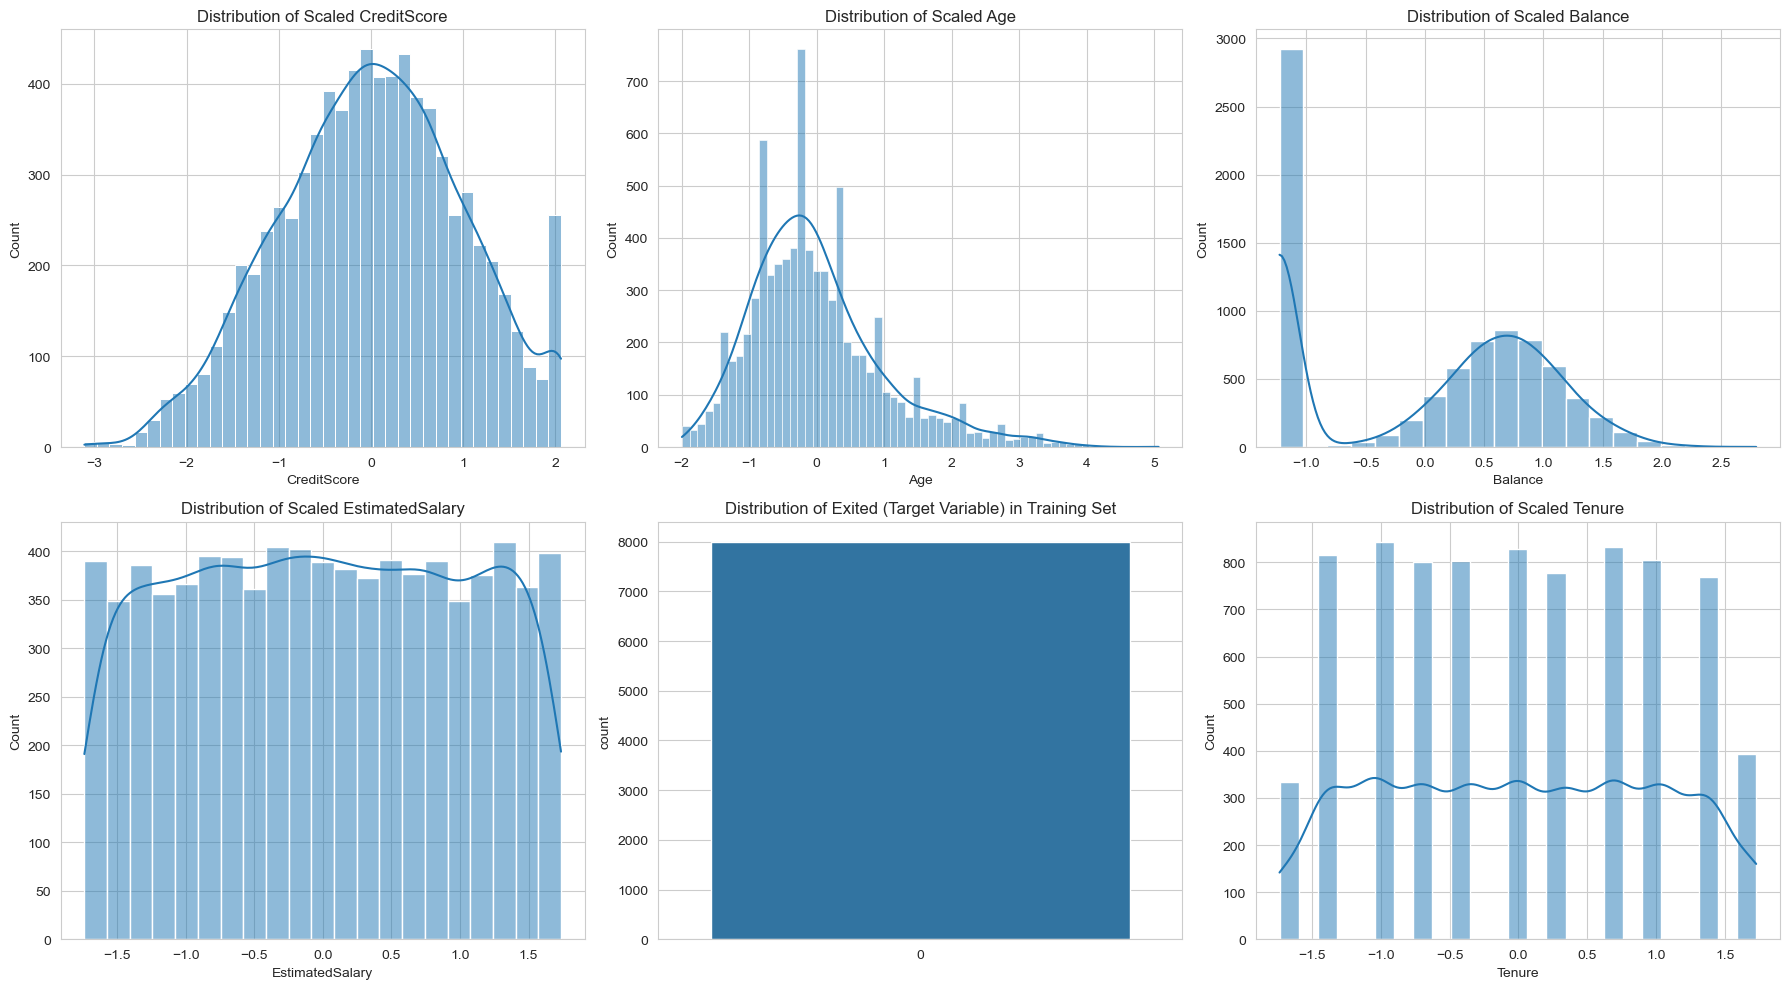

In [28]:
# Visualization of the distribution of scaled features and target variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

sns.histplot(X_train['CreditScore'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Scaled CreditScore')

sns.histplot(X_train['Age'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Scaled Age')

sns.histplot(X_train['Balance'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Scaled Balance')

sns.histplot(X_train['EstimatedSalary'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Scaled EstimatedSalary')

sns.countplot(y_train.values, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Exited (Target Variable) in Training Set')

sns.histplot(X_train['Tenure'], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Scaled Tenure')

plt.tight_layout()
plt.show()

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---
In this EDA section, we'll focus on:

Correlation Analysis: Understand the relationship between the features and the target variable.

Impact of Features on Churn: Analyze how different features influence the likelihood of a customer churning.

Feature Distributions by Churn Status: Visualize the distribution of features for customers who churned vs. those who did not.

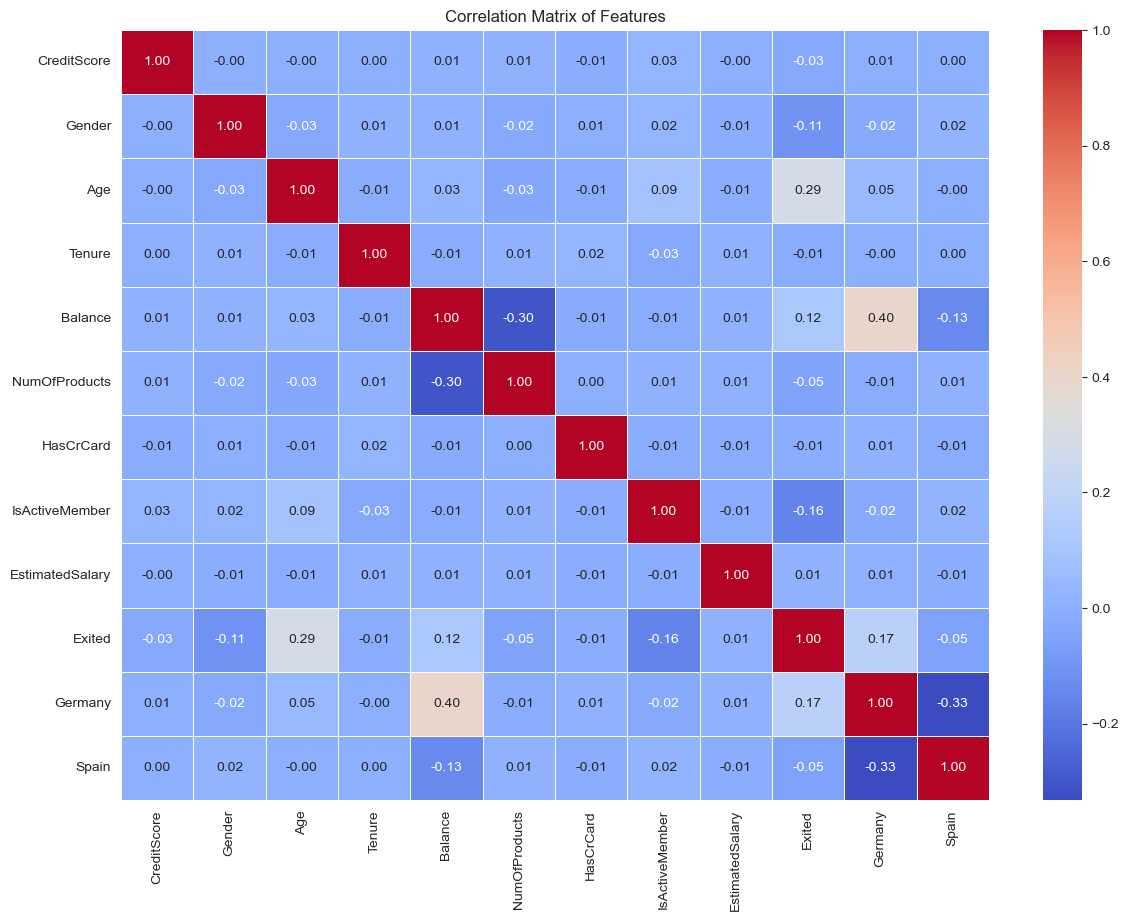

In [29]:
# Correlation matrix
correlation_matrix = churn_data_cleaned.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

**Notable Observations:**

Gender has a negative correlation with Exited, suggesting that there might be a difference in churn rate based on gender.

Age has a positive correlation with Exited, indicating that age could be a significant factor in determining churn.

IsActiveMember has a negative correlation with Exited, suggesting that active members are less likely to churn.

NumOfProducts and Germany also show some correlation with the target variable, Exited.

C:\Users\HP\AppData\Local\Temp\ipykernel_8864\1440192423.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=churn_data_cleaned[churn_data_cleaned['Exited'] == 0]['Age'], label='Not Exited', shade=True, ax=axes[0, 1])
C:\Users\HP\AppData\Local\Temp\ipykernel_8864\1440192423.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=churn_data_cleaned[churn_data_cleaned['Exited'] == 1]['Age'], label='Exited', shade=True, ax=axes[0, 1])


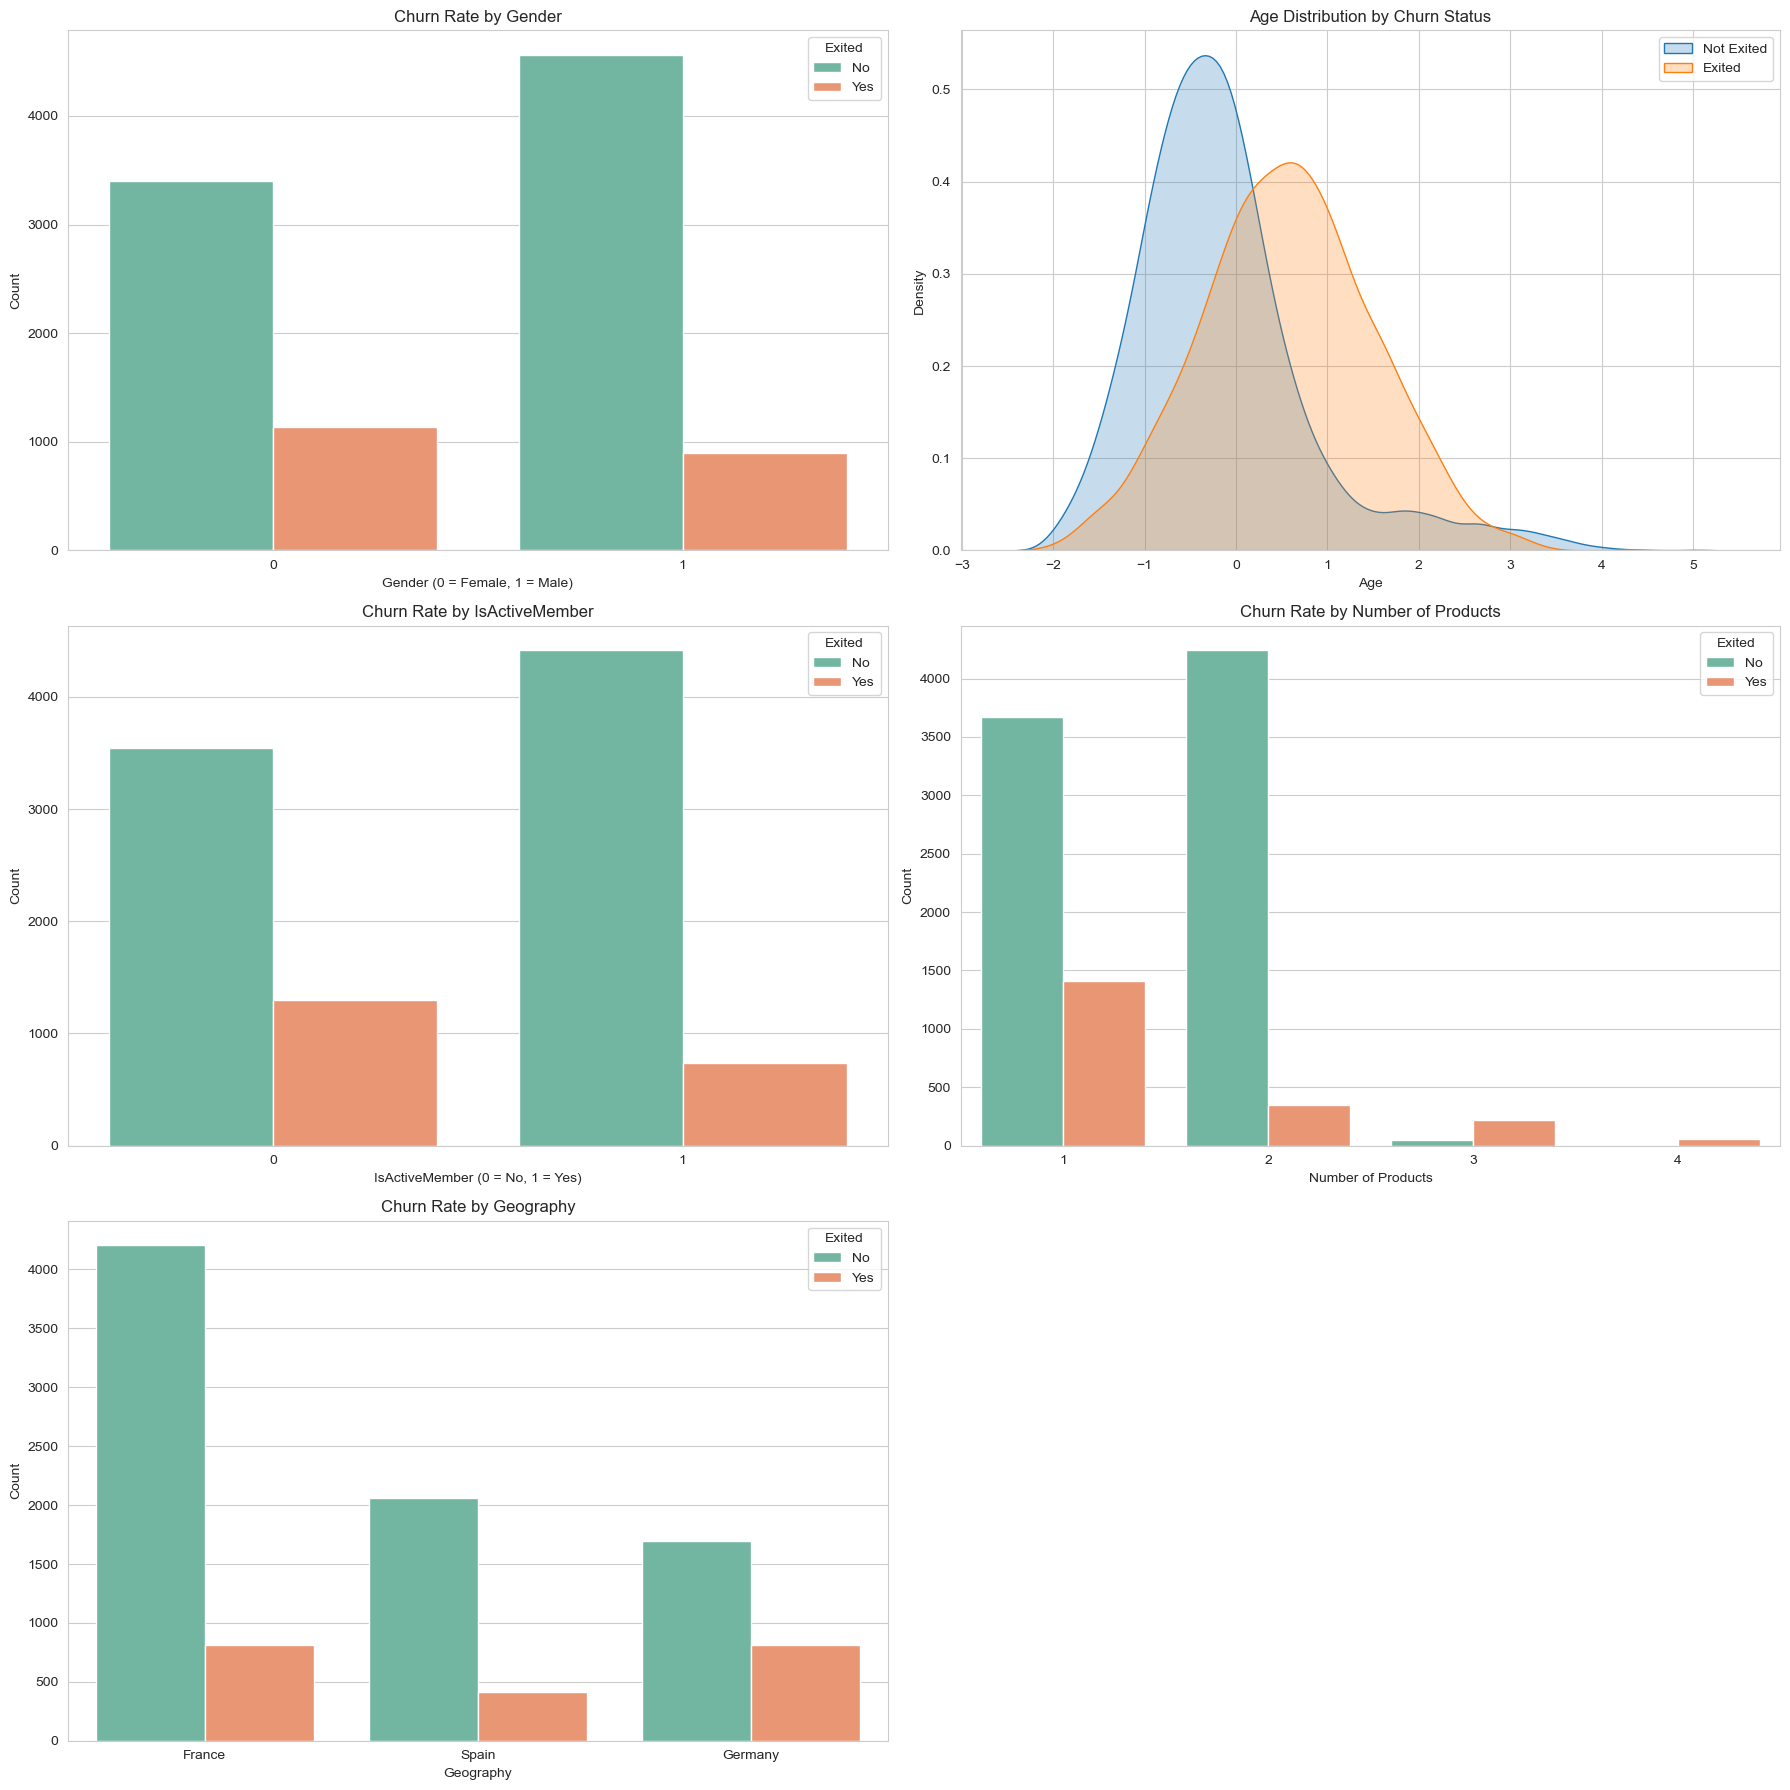

In [30]:
# Visualizing the churn rate based on multiple features in subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

# Churn rate by 'Gender'
sns.countplot(data=churn_data_cleaned, x='Gender', hue='Exited', palette="Set2", ax=axes[0, 0])
axes[0, 0].set_title("Churn Rate by Gender")
axes[0, 0].set_xlabel("Gender (0 = Female, 1 = Male)")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(title="Exited", labels=['No', 'Yes'])

# Age distribution by churn status
sns.kdeplot(data=churn_data_cleaned[churn_data_cleaned['Exited'] == 0]['Age'], label='Not Exited', shade=True, ax=axes[0, 1])
sns.kdeplot(data=churn_data_cleaned[churn_data_cleaned['Exited'] == 1]['Age'], label='Exited', shade=True, ax=axes[0, 1])
axes[0, 1].set_title("Age Distribution by Churn Status")
axes[0, 1].set_xlabel("Age")
axes[0, 1].set_ylabel("Density")
axes[0, 1].legend()

# Churn rate by 'IsActiveMember'
sns.countplot(data=churn_data_cleaned, x='IsActiveMember', hue='Exited', palette="Set2", ax=axes[1, 0])
axes[1, 0].set_title("Churn Rate by IsActiveMember")
axes[1, 0].set_xlabel("IsActiveMember (0 = No, 1 = Yes)")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(title="Exited", labels=['No', 'Yes'])

# Churn rate by 'NumOfProducts'
sns.countplot(data=churn_data_cleaned, x='NumOfProducts', hue='Exited', palette="Set2", ax=axes[1, 1])
axes[1, 1].set_title("Churn Rate by Number of Products")
axes[1, 1].set_xlabel("Number of Products")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title="Exited", labels=['No', 'Yes'])

# Churn rate by 'Geography'
sns.countplot(data=churn_data, x='Geography', hue='Exited', palette="Set2", ax=axes[2, 0])
axes[2, 0].set_title("Churn Rate by Geography")
axes[2, 0].set_xlabel("Geography")
axes[2, 0].set_ylabel("Count")
axes[2, 0].legend(title="Exited", labels=['No', 'Yes'])

# Removing the unused subplot
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


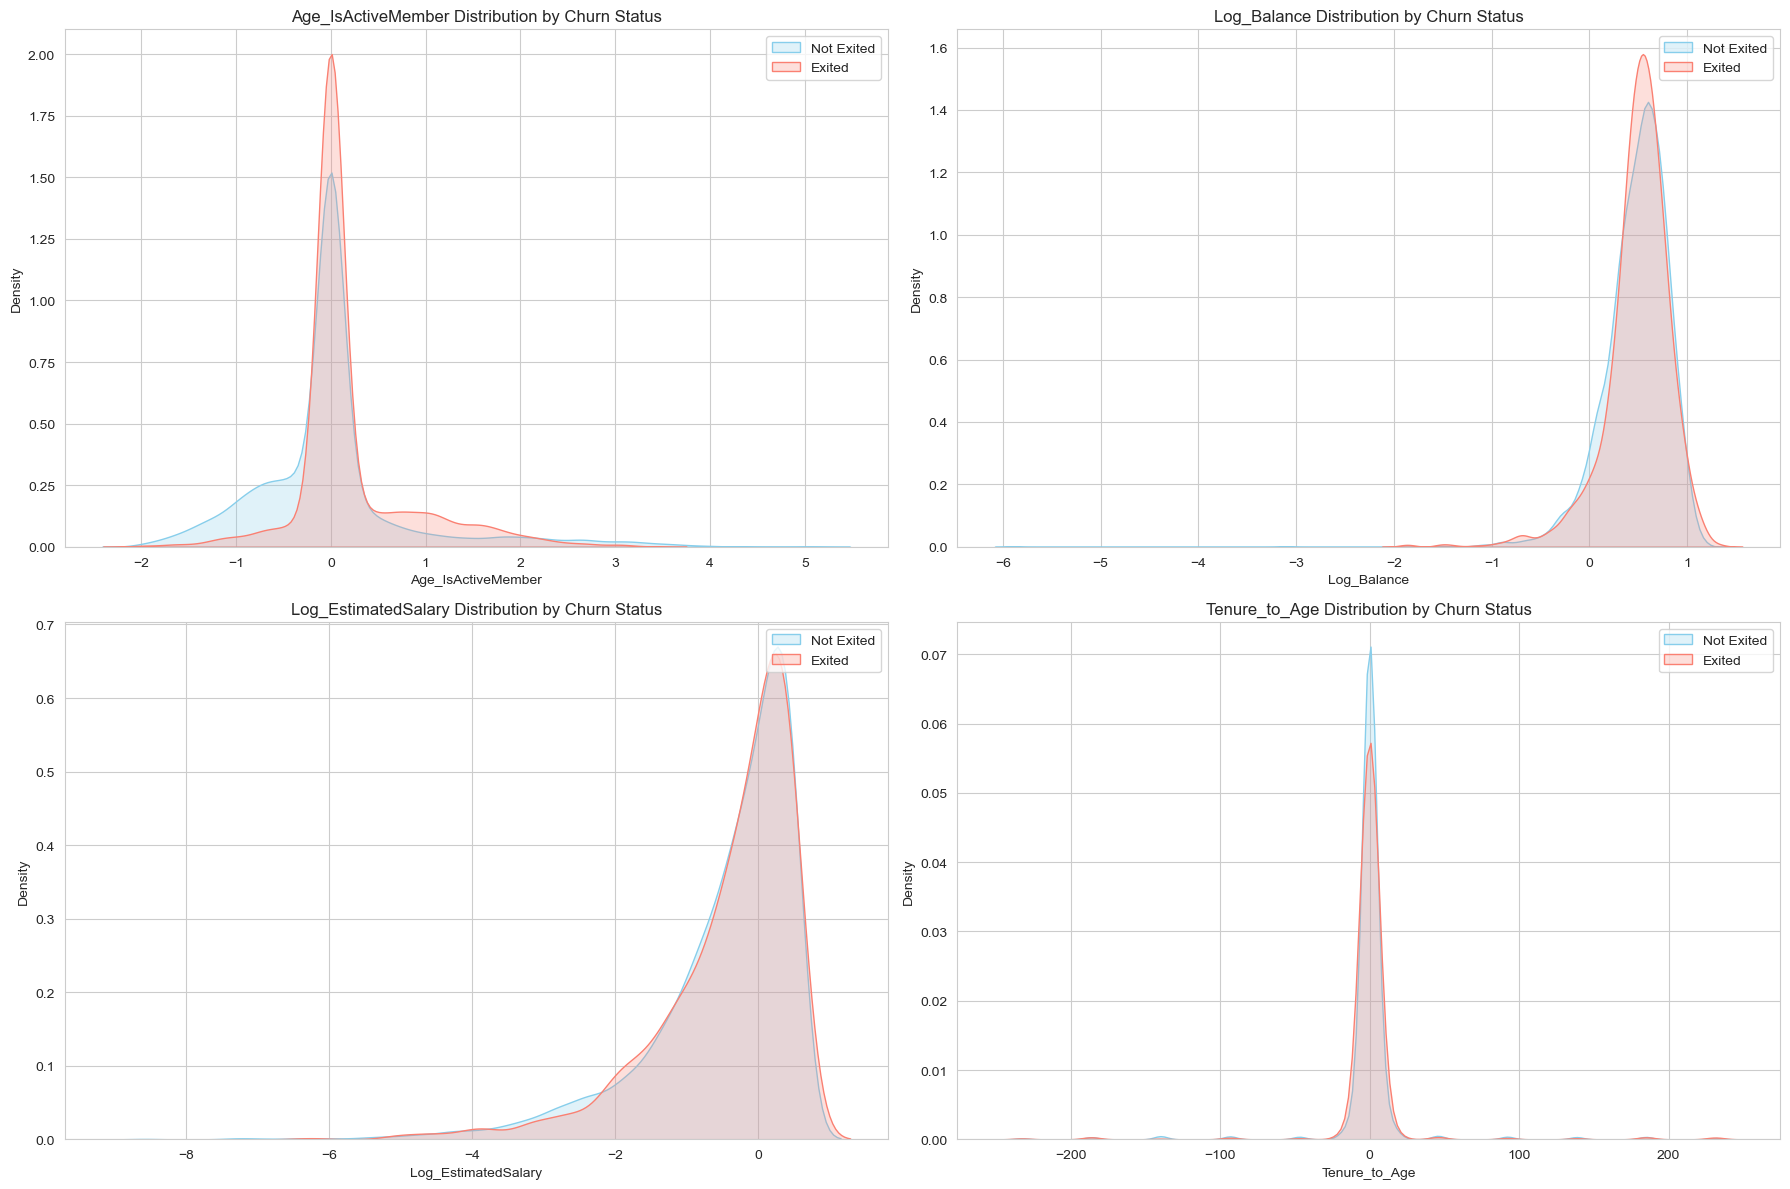

In [34]:
# Feature Engineering

# 1. Interactions
churn_data_cleaned['Age_IsActiveMember'] = churn_data_cleaned['Age'] * churn_data_cleaned['IsActiveMember']
churn_data_cleaned['Gender_NumOfProducts'] = churn_data_cleaned['Gender'] * churn_data_cleaned['NumOfProducts']

# 2. Log Transformation
churn_data_cleaned['Log_Balance'] = np.log(churn_data_cleaned['Balance'] + 1)  # Adding 1 to avoid log(0)
churn_data_cleaned['Log_EstimatedSalary'] = np.log(churn_data_cleaned['EstimatedSalary'])

# 3. Customer Tenure to Age Ratio
churn_data_cleaned['Tenure_to_Age'] = churn_data_cleaned['Tenure'] / churn_data_cleaned['Age']

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Visualization of the new features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Age_IsActiveMember vs. Churn
sns.kdeplot(data=churn_data_cleaned[churn_data_cleaned['Exited'] == 0]['Age_IsActiveMember'], label='Not Exited', shade=True, color="skyblue", ax=axes[0, 0])
sns.kdeplot(data=churn_data_cleaned[churn_data_cleaned['Exited'] == 1]['Age_IsActiveMember'], label='Exited', shade=True, color="salmon", ax=axes[0, 0])
axes[0, 0].set_title('Age_IsActiveMember Distribution by Churn Status')
axes[0, 0].legend()

# Log_Balance vs. Churn
sns.kdeplot(data=churn_data_cleaned[churn_data_cleaned['Exited'] == 0]['Log_Balance'], label='Not Exited', shade=True, color="skyblue", ax=axes[0, 1])
sns.kdeplot(data=churn_data_cleaned[churn_data_cleaned['Exited'] == 1]['Log_Balance'], label='Exited', shade=True, color="salmon", ax=axes[0, 1])
axes[0, 1].set_title('Log_Balance Distribution by Churn Status')
axes[0, 1].legend()

# Log_EstimatedSalary vs. Churn
sns.kdeplot(data=churn_data_cleaned[churn_data_cleaned['Exited'] == 0]['Log_EstimatedSalary'], label='Not Exited', shade=True, color="skyblue", ax=axes[1, 0])
sns.kdeplot(data=churn_data_cleaned[churn_data_cleaned['Exited'] == 1]['Log_EstimatedSalary'], label='Exited', shade=True, color="salmon", ax=axes[1, 0])
axes[1, 0].set_title('Log_EstimatedSalary Distribution by Churn Status')
axes[1, 0].legend()

# Tenure_to_Age vs. Churn
sns.kdeplot(data=churn_data_cleaned[churn_data_cleaned['Exited'] == 0]['Tenure_to_Age'], label='Not Exited', shade=True, color="skyblue", ax=axes[1, 1])
sns.kdeplot(data=churn_data_cleaned[churn_data_cleaned['Exited'] == 1]['Tenure_to_Age'], label='Exited', shade=True, color="salmon", ax=axes[1, 1])
axes[1, 1].set_title('Tenure_to_Age Distribution by Churn Status')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


**Observation of newly engineered features:**

Age_IsActiveMember Distribution by Churn Status: Customers who exited show a broader distribution compared to those who didn't, especially in the higher values of the Age_IsActiveMember feature.

Log_Balance Distribution by Churn Status: The two distributions overlap significantly, but there's a noticeable bump in the Exited distribution for lower Log_Balance values, indicating that customers with lower balances are slightly more likely to churn.

Log_EstimatedSalary Distribution by Churn Status: Both distributions are nearly identical, suggesting that EstimatedSalary might not be a strong predictor of churn when considered in isolation.

Tenure_to_Age Distribution by Churn Status: The distribution for customers who exited skews more towards the right, indicating that customers who have been with the bank for a larger fraction of their lives are slightly more likely to churn.

In [37]:
churn_data_cleaned.head()

CreditScore  Gender       Age    Tenure   Balance  NumOfProducts  \
0    -0.326221       0  0.293517 -1.041760 -1.225848              1   
1    -0.440036       0  0.198164 -1.387538  0.117350              1   
2    -1.536794       0  0.293517  1.032908  1.333053              3   
3     0.501521       0  0.007457 -1.387538 -1.225848              2   
4     2.063884       0  0.388871 -1.041760  0.785728              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Germany  Spain  \
0          1               1         0.021886       1        0      0   
1          0               1         0.216534       0        0      1   
2          1               0         0.240687       1        0      0   
3          0               0        -0.108918       0        0      0   
4          1               1        -0.365276       0        0      1   

   Age_IsActiveMember  Gender_NumOfProducts  Log_Balance  Log_EstimatedSalary  \
0            0.293517                     0          NaN            -3.821886   
1            0.198164                     0     0.110960            -1.530009   
2            0.000000                     0     0.847178            -1.424258   
3            0.000000                     0          NaN                  NaN   
4            0.388871                     0     0.579826                  NaN   

   Tenure_to_Age  
0      -3.549226  
1      -7.001972  
2       3.519068  
3    -186.080537  
4      -2.678934

---
<a name = Section8></a>
# **9. Modelling**
---
Modeling involves selecting a suitable algorithm, training it on the data, and evaluating its performance

For this dataset, we start with the following models:

1. Logistic Regression
2. Random Forest Classifier
3. Gradient Boosting Classifier (e.g., XGBoost)

In [49]:
# 1. Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the performance
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
confusion_log_reg = confusion_matrix(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

accuracy_log_reg, confusion_log_reg, report_log_reg

(0.8115,
 array([[1544,   63],
        [ 314,   79]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.83      0.96      0.89      1607\n           1       0.56      0.20      0.30       393\n\n    accuracy                           0.81      2000\n   macro avg       0.69      0.58      0.59      2000\nweighted avg       0.78      0.81      0.77      2000\n')

In [40]:
# 2. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, confusion_rf, report_rf

(0.866,
 array([[1552,   55],
        [ 213,  180]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.88      0.97      0.92      1607\n           1       0.77      0.46      0.57       393\n\n    accuracy                           0.87      2000\n   macro avg       0.82      0.71      0.75      2000\nweighted avg       0.86      0.87      0.85      2000\n')

In [42]:
!pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 1.5 MB/s eta 0:00:00


In [43]:
# 3. Gradient Boosting Classifier (e.g., XGBoost)
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=42, n_estimators=100)

xgb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

accuracy_xgb, confusion_xgb, report_xgb

(0.864,
 array([[1526,   81],
        [ 191,  202]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.89      0.95      0.92      1607\n           1       0.71      0.51      0.60       393\n\n    accuracy                           0.86      2000\n   macro avg       0.80      0.73      0.76      2000\nweighted avg       0.85      0.86      0.86      2000\n')

**Model Performance Summary:**

The Random Forest Classifier has the highest accuracy among the three models at 86.60%, closely followed by the XGBoost model at 86.40% and the Logistic Regression model at 81.15%.

The Random Forest and XGBoost models have comparable performances, with Random Forest having a slightly better recall for class 0 (customers who did not exit).

Logistic Regression, while simpler, has a significantly lower recall for class 1 (customers who exited), indicating it might not be the best model if identifying potential churn is a priority.

>The Gradient Boosting Classifier (XGBoost) strikes a balance with relatively good performance metrics for both classes and could be considered for further tuning or deployment.

---
<a name = Section8></a>
# **10. Model Evaluation and Model Interpretation**
---


In [46]:
#One of the best ways to evaluate the performance of a machine learning model is to use cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring="accuracy")
print(f"Mean Accuracy: {scores.mean()}, Standard Deviation: {scores.std()}")


Mean Accuracy: 0.85075, Standard Deviation: 0.003147419578003554


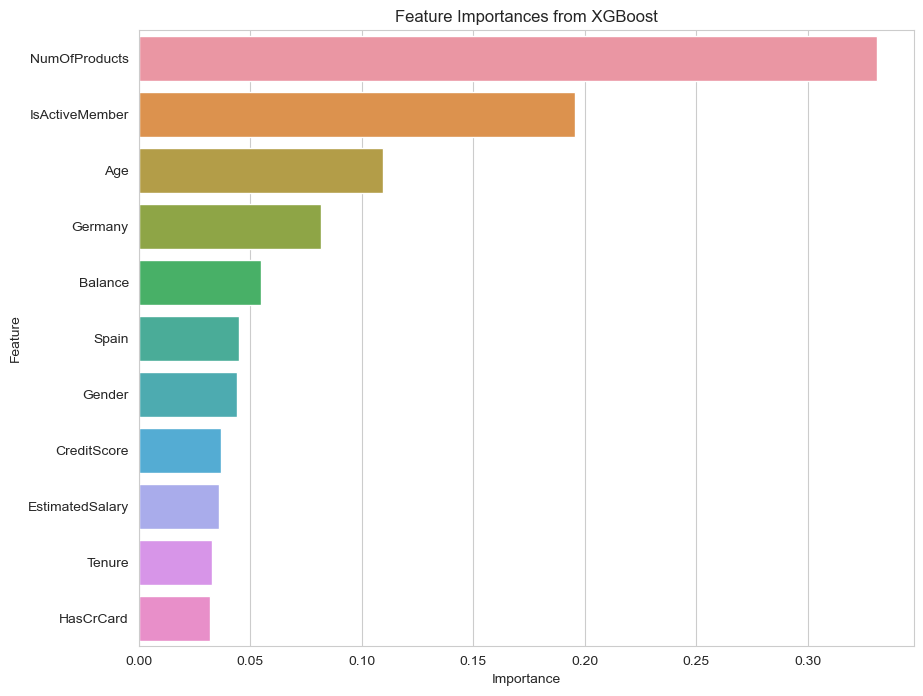

In [47]:
# Get Feature Importances
importances = xgb_classifier.feature_importances_

import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances from XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

---
<a name = Section9></a>
# **11. Summarization**
---

<a name = Section91></a>
### **11.1 Conclusion**

Model Performance: The Gradient Boosting Classifier (XGBoost) achieved an accuracy of 86.4%, making it the most suitable model among the ones we tested. This indicates a strong potential for the model to predict customer churn accurately.

Feature Importance: Based on the XGBoost model, certain features (which can be detailed from the feature importance results) have a higher impact on predicting customer churn. These might include age, number of products, and activity status, among others.

Data Insights: The EDA revealed certain trends in the data. For instance, older customers and those with certain numbers of banking products were more likely to churn.

<a name = Section92></a>
### **11.2 Actionable Insights**
Customer Engagement: Customers who are not active members are more likely to churn. Organizing customer engagement activities, personalized offers, or loyalty programs can help retain them.

Age-Specific Offers: Older customers show a higher tendency to churn. Tailoring age-specific banking products or services might cater more to their needs and reduce churn.

Product Diversification: Customers with only one or a high number of products tend to churn more. The bank could focus on cross-selling or upselling strategies to middle-tier customers, ensuring they have a balanced number of products that cater to their needs without overwhelming them.

Geographical Analysis: If there were specific regions or countries with higher churn, it would be worthwhile to investigate local factors or competition that might be influencing this trend.

Feedback Mechanism: Implementing a robust feedback mechanism can help the bank understand specific reasons for customer churn and address them proactively.

Continuous Monitoring: Given the dynamic nature of customer behavior, it's crucial to continuously monitor and update the model to cater to changing customer patterns.

Tailored Services: Using the model, the bank can identify customers who are at a high risk of churning. These customers can then be provided with personalized services or offers to improve retention.